## Etapa: 02. Análise exploratória

#### Código criado por: Eduardo Arthur Bitencourt  | Data: 02/08/2023
##### Github: https://github.com/bitencourt-eduardo  | Linkedin: https://www.linkedin.com/in/bitencourt-eduardo/

In [108]:
#!pip install matplotlib
#!pip install seaborn

In [109]:
#Importar Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#### Carregando arquivos FieldPRO

Sensor_FieldPRO, dados transmitidos pelo sensor

In [110]:
# Carregar arquivo de dados transmitidos pelo sensor
name_file = 'df_merged.csv'
diretorio = '../datasets/{name_file}'

df = pd.read_csv(diretorio.format(name_file=name_file), sep=';', decimal='.' )
df.head()

,datetime,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,chuva
0,2020-09-30 23:00:00+00:00,38.0,31.366,9412,0,45123,30,0.0
1,2020-10-01 01:00:00+00:00,39.0,31.366,9419,0,44923,31,0.0
2,2020-10-01 02:00:00+00:00,39.0,31.322,9419,0,44825,31,0.0
3,2020-10-01 03:00:00+00:00,38.0,31.240,9416,0,44728,31,0.0
4,2020-10-01 04:00:00+00:00,39.0,30.828,9411,0,44632,30,0.0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             1525 non-null   object 
 1   air_humidity_100     1525 non-null   float64
 2   air_temperature_100  1525 non-null   float64
 3   atm_pressure_main    1525 non-null   int64  
 4   num_of_resets        1525 non-null   int64  
 5   piezo_charge         1525 non-null   int64  
 6   piezo_temperature    1525 non-null   int64  
 7   chuva                1525 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 95.4+ KB


___________________________________________________
Corrigindo formato time-stamp do campo data

In [112]:
df['datetime'] = pd.to_datetime(df['datetime'], format='ISO8601')
df.head()

,datetime,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,chuva
0,2020-09-30 23:00:00+00:00,38.0,31.366,9412,0,45123,30,0.0
1,2020-10-01 01:00:00+00:00,39.0,31.366,9419,0,44923,31,0.0
2,2020-10-01 02:00:00+00:00,39.0,31.322,9419,0,44825,31,0.0
3,2020-10-01 03:00:00+00:00,38.0,31.240,9416,0,44728,31,0.0
4,2020-10-01 04:00:00+00:00,39.0,30.828,9411,0,44632,30,0.0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   datetime             1525 non-null   datetime64[ns, UTC]
 1   air_humidity_100     1525 non-null   float64            
 2   air_temperature_100  1525 non-null   float64            
 3   atm_pressure_main    1525 non-null   int64              
 4   num_of_resets        1525 non-null   int64              
 5   piezo_charge         1525 non-null   int64              
 6   piezo_temperature    1525 non-null   int64              
 7   chuva                1525 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(4)
memory usage: 95.4 KB


In [114]:
df.describe()

,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,chuva
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,58.704262,24.776121,9432.478689,1.495082,44192.804590,25.028197,0.093377
std,21.933831,6.305237,27.272016,1.040900,12650.914075,8.522773,0.829280
min,13.000000,12.360000,9350.000000,0.000000,16950.000000,11.000000,0.000000
25%,40.000000,19.900000,9415.000000,1.000000,34701.000000,18.000000,0.000000
50%,59.000000,23.120000,9433.000000,1.000000,43968.000000,22.000000,0.000000
75%,78.000000,29.720000,9451.000000,2.000000,54999.000000,32.000000,0.000000
max,99.000000,42.664000,9507.000000,3.000000,65533.000000,47.000000,16.800000


_____________________________________________________________________________________________________________________________

# Análise Gráfica

* Gráficos temporais

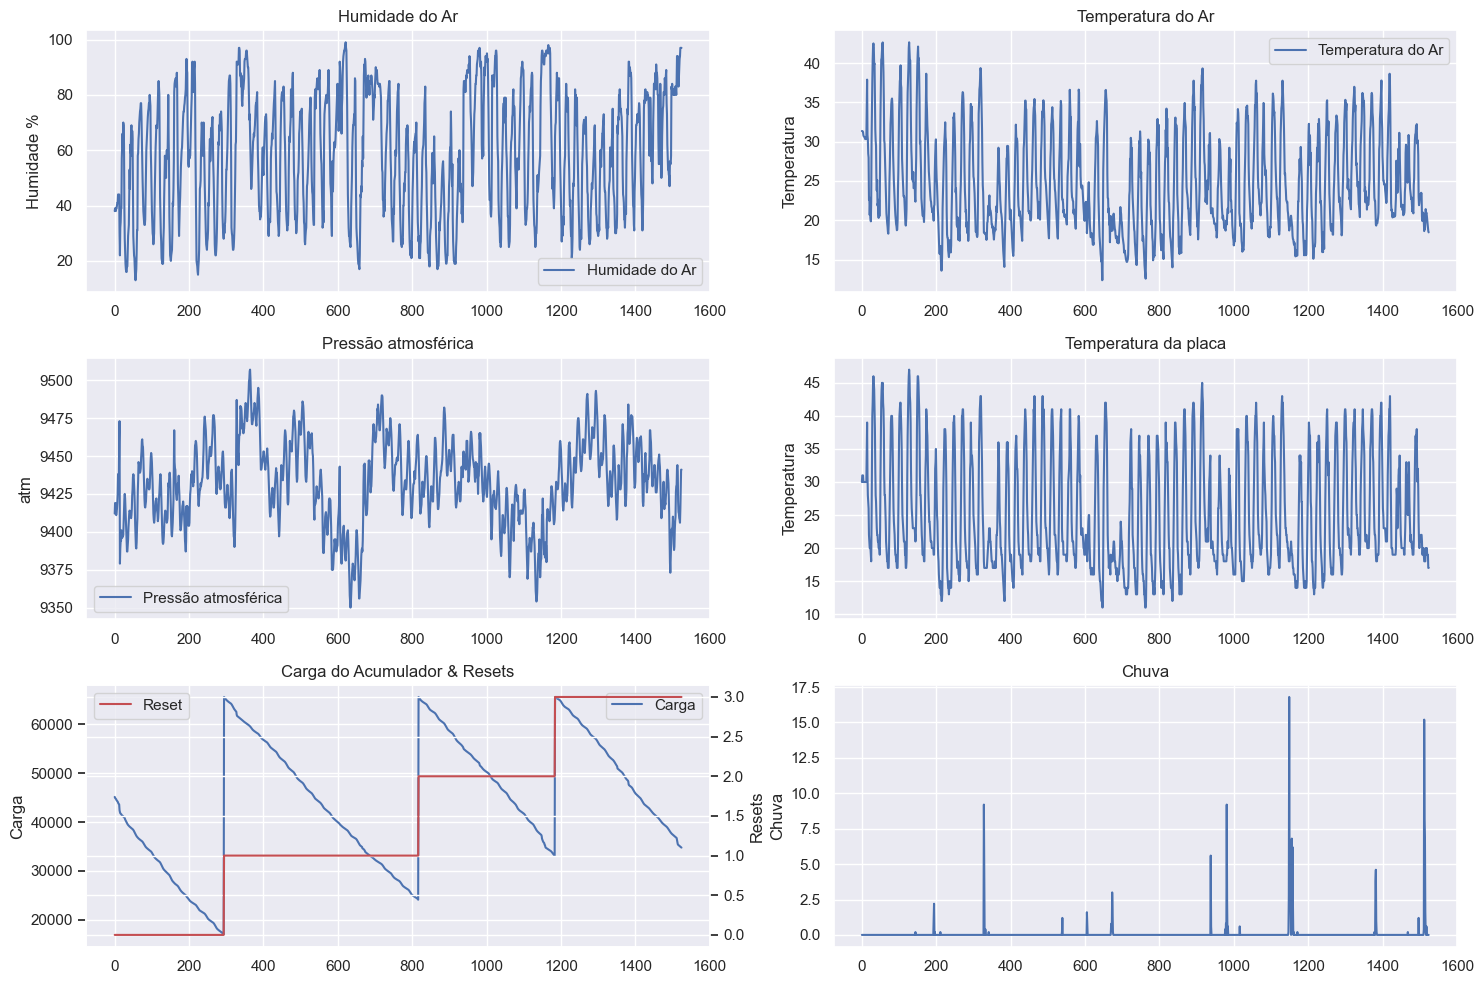

In [115]:
# Configurando estilo do Seaborn
sns.set(style="darkgrid")

# Criando a primeira figura e plotando o gráfico temporal para Humidade do Ar
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(data=df, x=df.index, y='air_humidity_100', label='Humidade do Ar')
#plt.xlabel('Data')
plt.ylabel('Humidade %')
plt.title('Humidade do Ar')

# Criando a segunda figura e plotando o gráfico temporal para Temperatura do Ar
plt.subplot(3, 2, 2)
sns.lineplot(data=df, x=df.index, y='air_temperature_100', label='Temperatura do Ar')
#plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.title('Temperatura do Ar')

# Criando a terceira figura e plotando o gráfico temporal para Pressão Atmosférica
plt.subplot(3, 2, 3)
sns.lineplot(data=df, x=df.index, y='atm_pressure_main', label='Pressão atmosférica')
#plt.xlabel('Data')
plt.ylabel('atm')
plt.title('Pressão atmosférica')

# Criando a quarta figura e plotando o gráfico temporal para Temperatura da Placa
plt.subplot(3, 2, 4)
sns.lineplot(data=df, x=df.index, y='piezo_temperature')
#plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.title('Temperatura da placa')

# Criando a quinta figura de eixo duplo e plotando o gráfico temporal para Carga do Acumulador número de Resets
plt.subplot(3, 2, 5)
sns.lineplot(data=df, x=df.index, y='piezo_charge', label='Carga', color='b')
plt.ylabel('Carga')
sns.lineplot(data=df, x=df.index, y='num_of_resets', label='Reset', color='r', ax=plt.twinx())
#plt.xlabel('Data')
plt.ylabel('Resets')
plt.title('Carga do Acumulador & Resets')

# Criando a sexta figura e plotando o gráfico temporal para Chuva
plt.subplot(3, 2, 6)
sns.lineplot(data=df, x=df.index, y='chuva')
#plt.xlabel('Data')
plt.ylabel('Chuva')
plt.title('Chuva')


# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo os gráficos
plt.show()

Observado:
*  Acumulador tem uma rampa de descarga que quando realizado reset é reestabelecida
* O reset foi realizado sem relação com temperatura da placa e com intervalos de descarga não uniformes
* Temperatura do Ar e temperatura da placa tem um comportamento uniforme


Text(0.5, 1.0, 'Carga do Acumulador & Chuva')

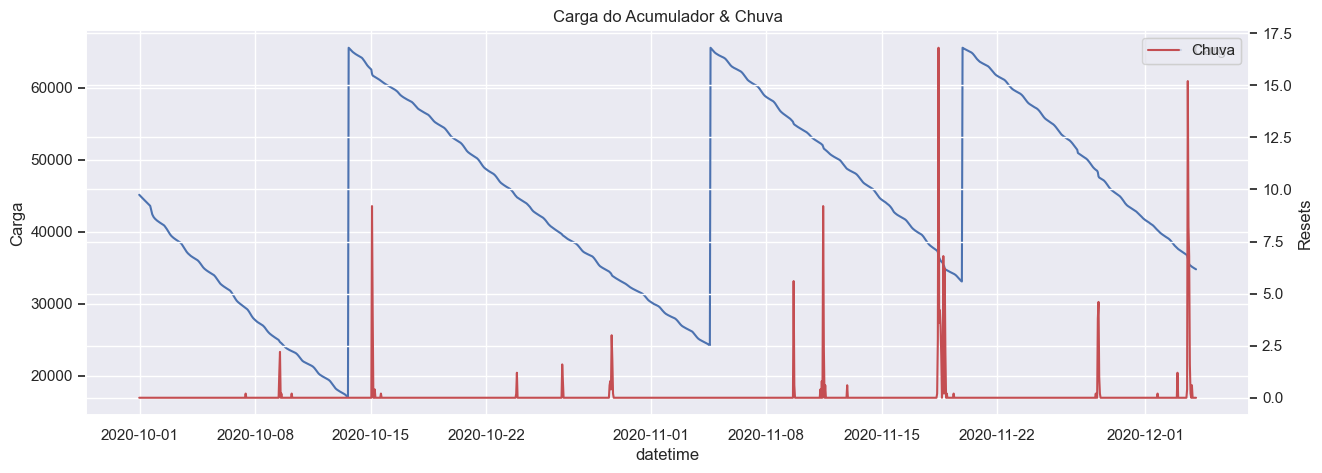

In [116]:
# Criando figura de eixo duplo e plotando o gráfico temporal para Carga do Acumulador e Chuva
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='datetime', y='piezo_charge', label='Carga', color='b')
plt.ylabel('Carga')
sns.lineplot(data=df, x='datetime', y='chuva', label='Chuva', color='r', ax=plt.twinx())
plt.xlabel('Data')
plt.ylabel('Resets')
plt.title('Carga do Acumulador & Chuva')

Para análise gráfica direta de Carga do acumulador e chuva NÃO FOI possível observar descarga visualmete significativa dentro da escala. 
Necessário análises mais profundas

Além disto observado poucos eventos de chuva dentro do dataset

# Análise Gráfica

* Gráficos boxplot

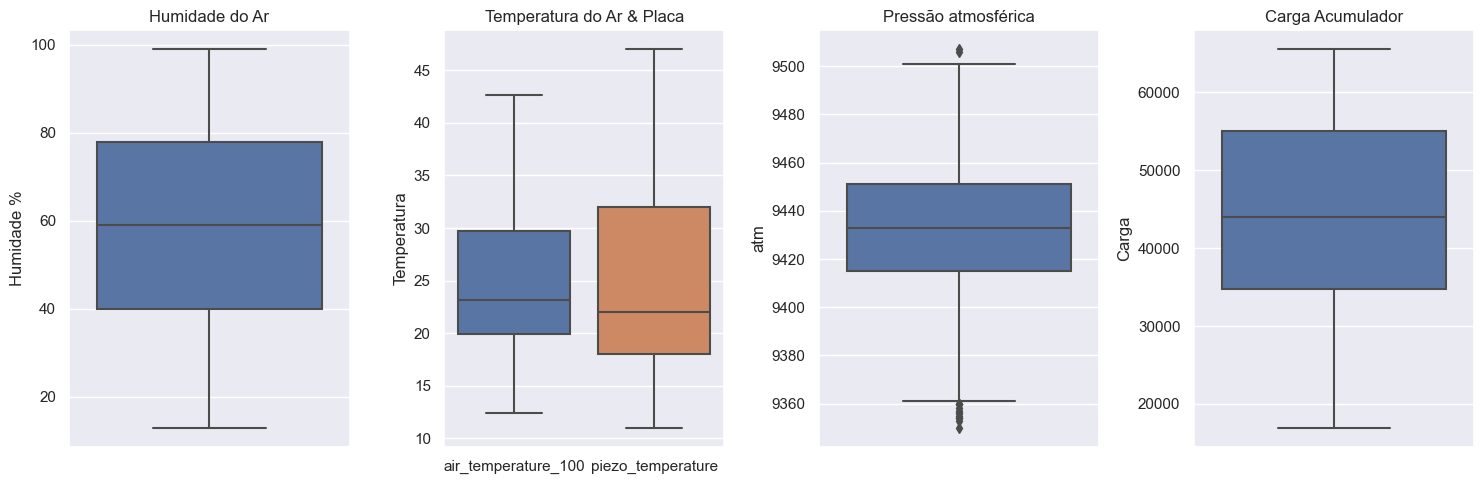

In [117]:
# Configurando estilo do Seaborn
sns.set(style="darkgrid")

# Criando a primeira figura e plotando o boxplot para Humidade do Ar
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
sns.boxplot(data=df, y='air_humidity_100')
plt.ylabel('Humidade %')
plt.title('Humidade do Ar')

# Criando a segunda figura e plotando o boxplot para Temperatura do Ar e Temperatura de Placa
plt.subplot(1, 4, 2 )
sns.boxplot(data=df[['air_temperature_100','piezo_temperature']])
plt.ylabel('Temperatura')
plt.title('Temperatura do Ar & Placa')


# Criando a terceira figura e plotando o gráfico temporal para Pressão Atmosférica
plt.subplot(1, 4, 3)
sns.boxplot(data=df, y='atm_pressure_main')
plt.ylabel('atm')
plt.title('Pressão atmosférica')


# Criando a quarta figura de eixo duplo e plotando o gráfico temporal para Carga do Acumulador número de Resets
plt.subplot(1, 4, 4)
sns.boxplot(data=df, y='piezo_charge')
plt.ylabel('Carga')
plt.title('Carga Acumulador')


# Ajustando o espaçamento entre os subplots
plt.tight_layout()

# Exibindo os gráficos
plt.show()

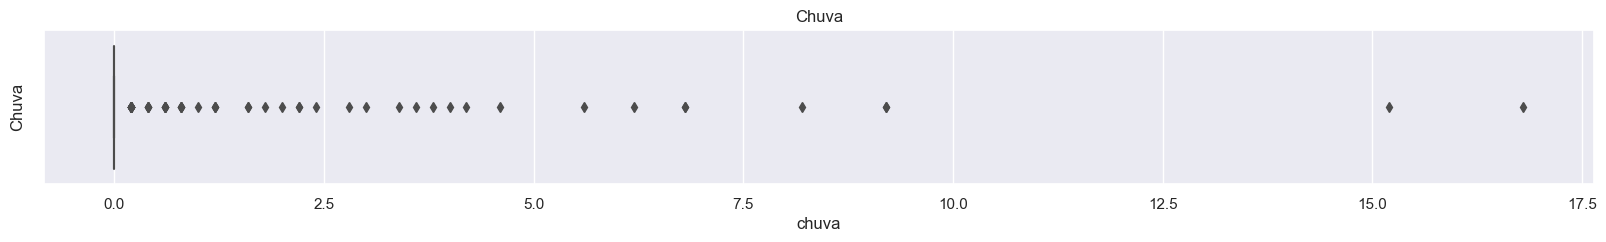

In [118]:
# Criando a sexta figura e plotando o boxplot para Chuva
plt.figure(figsize=(20, 2))
sns.boxplot(data=df, x='chuva')
plt.ylabel('Chuva')
plt.title('Chuva')

# Exibindo os gráficos
plt.show()

Observado:
* Temperatura do ar e placa tem médias e quarters próximos, sem outliers
* Humidade não tem outliers
* Carga no acumulador não tem outliers
* Pressão atmosférica é o dado com maior concentração próximo a média embora tenha outliers a serem investigados
* Chuva tem poucos dados concentrando-se média em ZERO, identificando os eventos de chuva omo Outliers.

# Análise Gráfica
* Histogramas

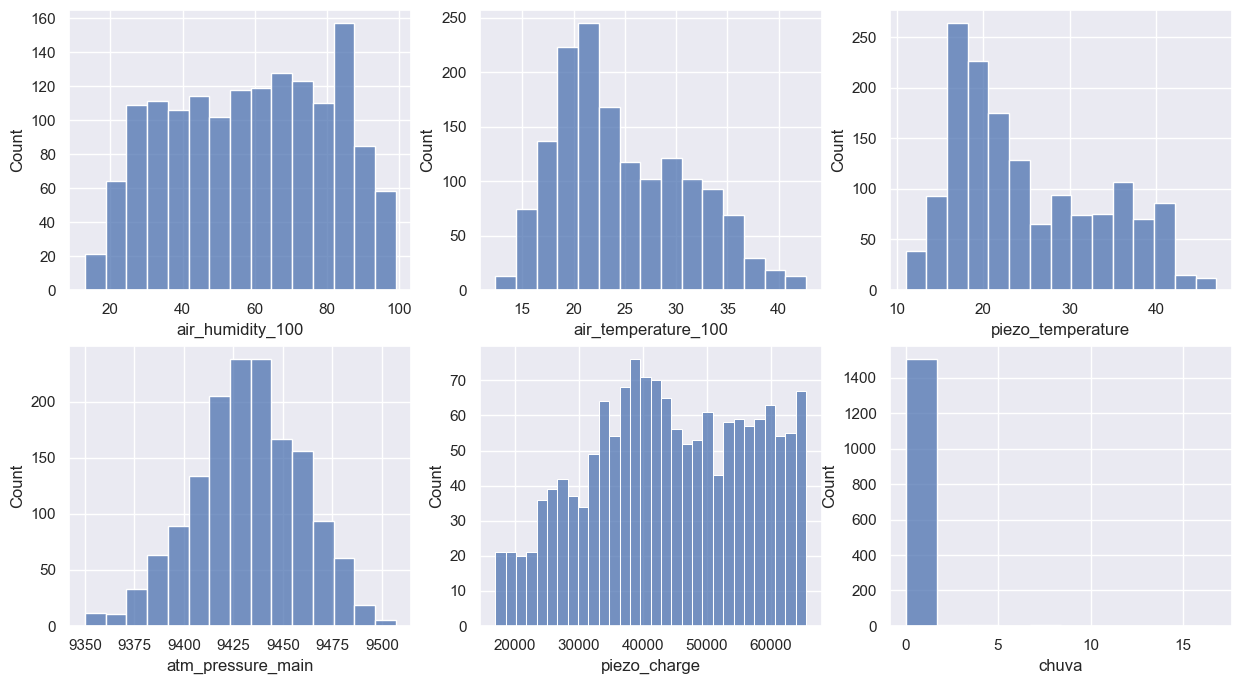

In [119]:
# Criando a primeira figura e plotando o boxplot para Humidade do Ar

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Plotando os histogramas em cada subplot
sns.histplot(df.air_humidity_100, bins=15, kde=False, color='b', ax=axs[0, 0])
sns.histplot(df.air_temperature_100, bins=15, kde=False, color='b', ax=axs[0, 1])
sns.histplot(df.piezo_temperature, bins=15, kde=False, color='b', ax=axs[0, 2])
sns.histplot(df.atm_pressure_main, bins=15, kde=False, color='b', ax=axs[1, 0])
sns.histplot(df.piezo_charge, bins=30, kde=False, color='b', ax=axs[1, 1])
sns.histplot(df.chuva, bins=10, kde=False, color='b', ax=axs[1, 2])


# Exibindo os gráficos
plt.show()

# PairPlot

/Users/Eduardo/Library/CloudStorage/OneDrive-Personal/WORK/FIELDPRO/Desafio FieldPRO/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/Eduardo/Library/CloudStorage/OneDrive-Personal/WORK/FIELDPRO/Desafio FieldPRO/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/Eduardo/Library/CloudStorage/OneDrive-Personal/WORK/FIELDPRO/Desafio FieldPRO/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/Eduardo/Library/CloudStorage/OneDrive-Personal/WORK/FIELDPRO/Desafio FieldPRO/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vec

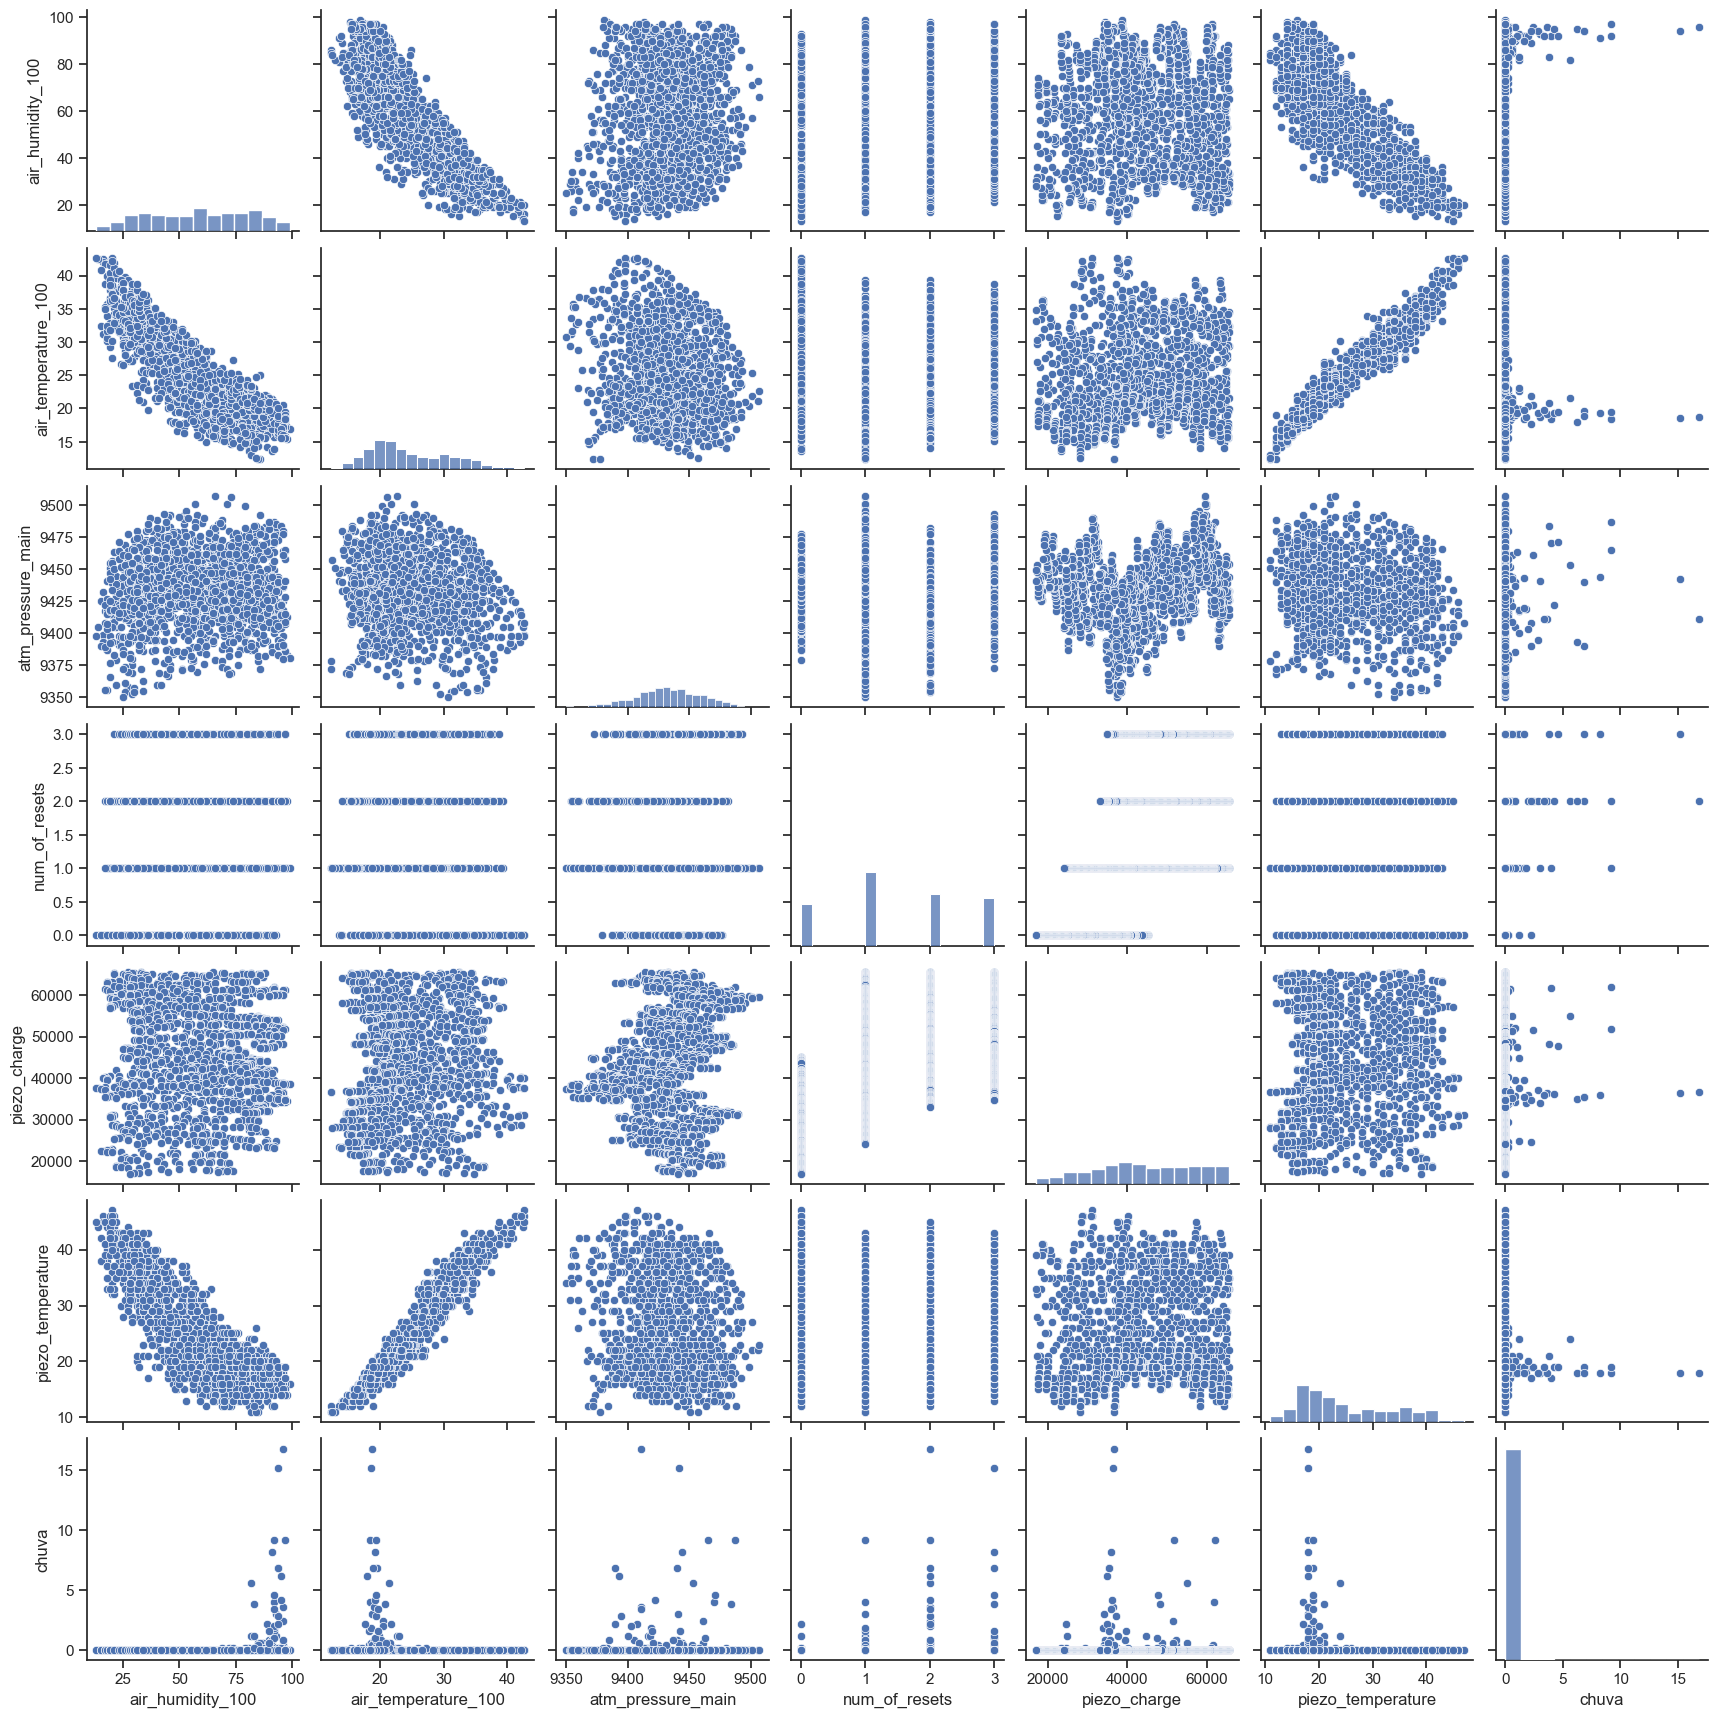

In [120]:
sns.set(style="ticks")

sns.pairplot(df, height=2.5, palette='')
plt.show()

Observado:
* Correlação FORTE entre Temperatura do Ar e Temperatura da Placa
* Correlação entre Humidade do Ar e Temperatura do Ar e consequentemente Temperatura da Placa
* Chuva sem correlaçoes fortes, mas interessante observar incidência em temperatura próxima a aprox 20 e humidade aprox 80

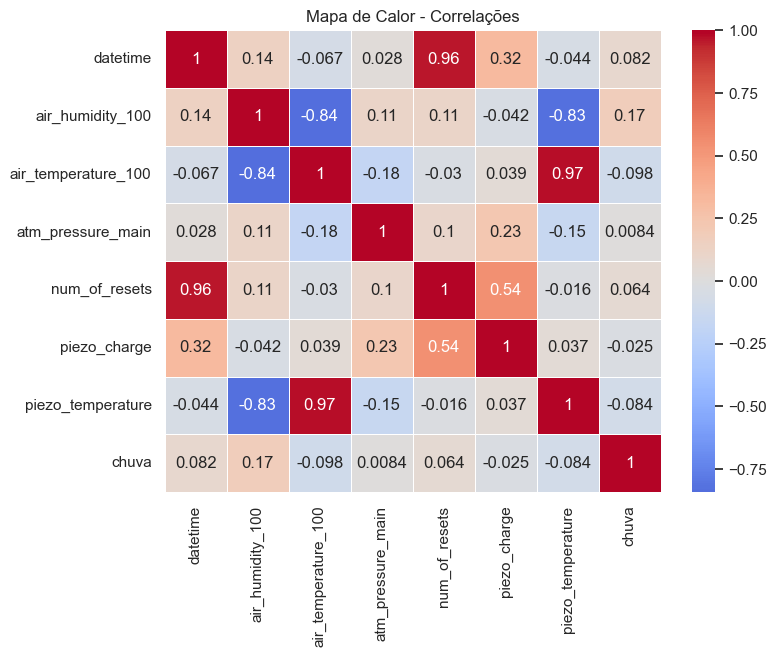

In [121]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Configurando estilo do Seaborn
sns.set(style="white")

# Criando o mapa de calor das correlações usando seaborn
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Mapa de Calor - Correlações')
plt.show()

Observado:
* Confirmada forte correlação positiva entre temperatura do ar e da placa
* Confirmada correlação entre humidade e temperaturas

Neste caso é recomendado remover uma das variáveis em virtude do efeito de multicolinearidade.
Opto por remover a temperatura do ar

In [122]:
df.drop('air_temperature_100', axis=1, inplace=True)
df.drop('datetime', axis=1, inplace=True)
df.head()

,air_humidity_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,chuva
0,38.0,9412,0,45123,30,0.0
1,39.0,9419,0,44923,31,0.0
2,39.0,9419,0,44825,31,0.0
3,38.0,9416,0,44728,31,0.0
4,39.0,9411,0,44632,30,0.0


In [150]:
df.to_csv('../datasets/df_cleaned_merged.csv', sep = ';', index=False)